In [1]:
import SR_lib as sr
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [2]:
## Read the Parse file
params_path = 'parameter_parse.txt'  # Parse input file
params = sr.read_simulation_parameters(params_path)
Vc = params.get('Vc')
Pr = params.get('Pr')
alpha = params.get('alpha')
beta = params.get('beta')
rho = params.get('rho')
tf = params.get('tf')
Af = params.get('Af')
Asig = params.get('A')
fsig = params.get('f')
sd = params.get('sd')
ts = params.get('ts')
n = params.get('n')
ens = params.get('ens')
dsf = params.get('dsf')  # Downsampling factor
bw = params.get('bw') 
T = params.get('T') 
Ec = Vc/tf

# study on noise

In [3]:
kb = 1.380649e-23
dt = ts

i = 2

## noise generated by generating bandlimited noise
t = np.arange(0, 1e-2, dt)
noise_blm = sr.gen_noise(t, sd[i], 1/bw)/tf

## noise generated by the Wiener process formula
Dext = (sd[i]**2)/(2*bw*rho*tf**2)
Dint = (kb*T)/(tf*Af)

noise_wie = []
for j in range(len(t)):
    noise_wie.append((np.sqrt(2*Dext*rho) + np.sqrt(2*Dint*rho)) * np.random.normal(0, np.sqrt(1/bw))*bw)

In [4]:
# with internal noise the equivalent std



In [5]:
print("sdt = ", np.std(noise_blm*tf))
print("Dext = ", Dext)
print("Dint =", Dint)

sdt =  0.16258506557296076
Dext =  8312.811080977173
Dint = 1.6242929411764707e-07


(1e-05, 10000000000.0)

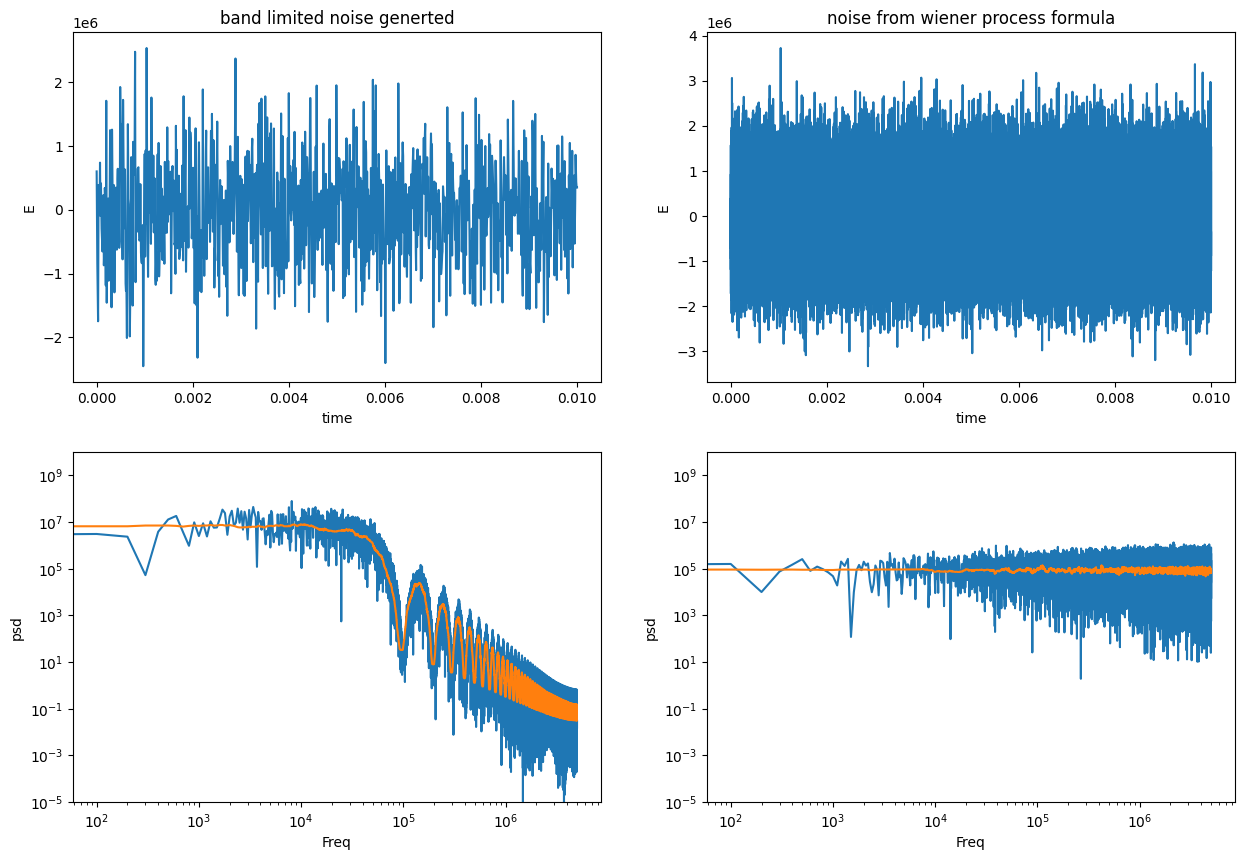

In [6]:
f, psd_nois_lm = sc.signal.periodogram(noise_blm, 1/ts, window = "boxcar")
f, psd_nois_wie = sc.signal.periodogram(noise_wie, 1/ts, window = "boxcar")

# moving avg meadian filter
mov_avg_len = 100
psd_median_lm_filt = []
psd_median_wie_filt = []
for i in range(len(f) - mov_avg_len):
    psd_median_lm_filt.append(np.median(psd_nois_lm[i:i+mov_avg_len]))
    psd_median_wie_filt.append(np.median(psd_nois_wie[i:i+mov_avg_len]))


plt.figure(figsize=(15,10))
plt.subplot(2,2,1); plt.plot(t, noise_blm); plt.title("band limited noise generted"); plt.xlabel("time"); plt.ylabel("E")
plt.subplot(2,2,2); plt.plot(t, noise_wie); plt.title("noise from wiener process formula"); plt.xlabel("time"); plt.ylabel("E")
plt.subplot(2,2,3); plt.loglog(f, psd_nois_lm ); plt.loglog(f[0:-mov_avg_len], psd_median_lm_filt ); plt.xlabel("Freq"); plt.ylabel("psd"); plt.ylim([1e-5,1e10])
plt.subplot(2,2,4); plt.loglog(f, psd_nois_wie); plt.loglog(f[0:-mov_avg_len], psd_median_wie_filt );  plt.xlabel("Freq"); plt.ylabel("psd"); plt.ylim([1e-5,1e10])

In [2]:
input_dir = "C:\\Drive\\FE_SR\\IITPKD_data_analysis\\cap_D\\SR\\freq_100"
tdrive, Vdrive, Pexp = sr.extract_tEP_data(input_dir + f"\\data_sd_{sd[0]}_itr{0}.txt")
tdrive = tdrive*1e-3
t, Vsig = sr.upsample(tdrive, Vdrive, ts)

NameError: name 'sd' is not defined